# Generating a telluric model

Generating a telluric model is simply a matter of defining the start and end points. The only tricky thing is that you have to supply them in wavenumber with units of ${\rm cm}^{-1}$. This would be an easy pull request if anyone wants to add astropy units support to the model...

In [1]:
# Import the packages we will use for this notebook
import telfit
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
try:
    import seaborn as sns
    sns.set_context('talk', font_scale=1.5)
    sns.set_style('whitegrid')
except ImportError:
    pass

%matplotlib inline

/home/kgullikson/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


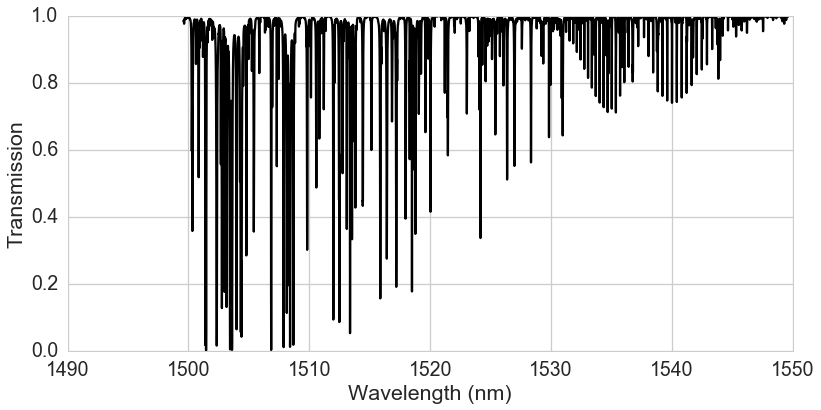

In [2]:
# Set the wavelengths
low_wave = 1500 * u.nm
high_wave = 1550 * u.nm
lowfreq = 1.0 / high_wave.to(u.cm).value
highfreq = 1.0 / low_wave.to(u.cm).value

#Generate the model
modeler = telfit.Modeler()
model = modeler.MakeModel(lowfreq=lowfreq, highfreq=highfreq)

# plot
fig, ax = plt.subplots(1, 1, figsize=(13,6))
ax.plot(model.x, model.y, 'k-')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission')

The actual work of making the model was just 2 lines of code: one to make an instance of the Modeler class, and another to actually make the model. 

That said, there are lots of ways to customize the model that gets created. You can see all the parameters [here](http://telfit.readthedocs.org/en/latest/MakeModel.html), but the default is usually pretty good for a generic model. Parameters you might want to change are shown below:

### Relative Humidity

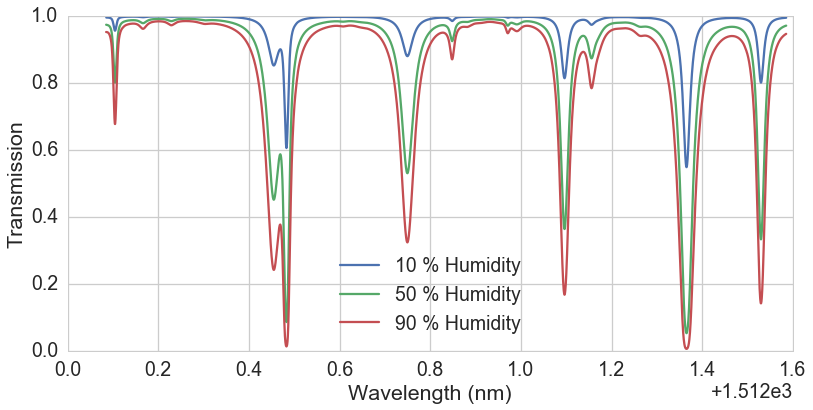

In [3]:
# Zoom in one some water lines
low_wave = 1512.5 * u.nm
high_wave = 1514. * u.nm
lowfreq = 1.0 / high_wave.to(u.cm).value
highfreq = 1.0 / low_wave.to(u.cm).value

# Make a figure/axes instance
fig, ax = plt.subplots(1, 1, figsize=(13,6))

for humidity in [10, 50, 90]:
    model = modeler.MakeModel(lowfreq=lowfreq, highfreq=highfreq, humidity=humidity)
    ax.plot(model.x, model.y, label='{} % Humidity'.format(humidity))

leg = ax.legend(loc='best')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission')


There is also a keyword for temperature; this is the temperature (in Kelvin) at the observatory. It mostly just impacts the effect of humidity on the resulting spectrum, and is generally degenerate with it in any fits.

### Any other abundance
While the water vapor content is controlled by the 'humidity' keyword argument, all of the other molecules are defined by their mixing ratio in parts per million (by volume) *at the location of the observatory*. The default values come from the value of the USNO Mid-latitude nighttime atmosphere profile at 2 km altitude:

<table>
  <tr>
    <th>Molecule</th>
    <th>Default Abundance (ppmv)</th>
  </tr>
  <tr>
    <td>CO2</td>
    <td>368.5</td>
  </tr>
  <tr>
    <td>O3</td>
    <td>0.039</td>
  </tr>
  <tr>
    <td>N2O</td>
    <td>0.32</td>
  </tr>
  <tr>
    <td>CO</td>
    <td>0.14</td>
  </tr>
  <tr>
    <td>CH4</td>
    <td>1.8</td>
  </tr>
  <tr>
    <td>O2</td>
    <td>2.1E5</td>
  </tr>
  <tr>
    <td>NO</td>
    <td>1.1E-19</td>
  </tr>
  <tr>
    <td>SO2</td>
    <td>1E-4</td>
  </tr>
  <tr>
    <td>NO2</td>
    <td>1E-4</td>
  </tr>
  <tr>
    <td>NH3</td>
    <td>1E-4</td>
  </tr>
  <tr>
    <td>HNO3</td>
    <td>5.6E-4</td>
  </tr>
</table>

You can control them in a similar way, but should generally stay on the same order of magnitude as the default value.

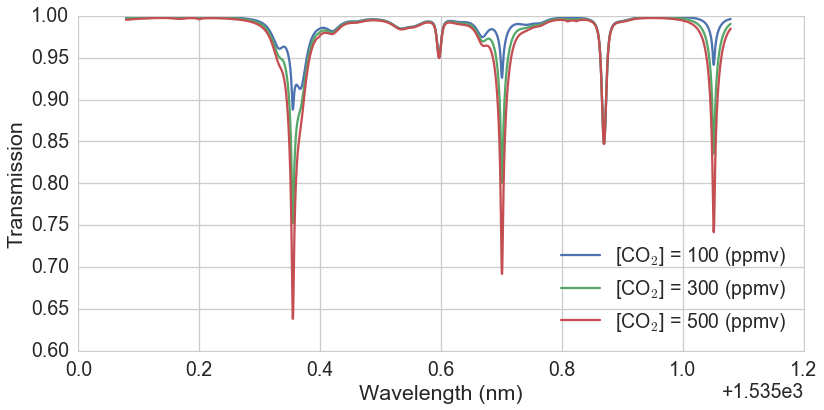

In [ ]:
# Zoom in one some CO2 lines
low_wave = 1535.5 * u.nm
high_wave = 1536.5 * u.nm
lowfreq = 1.0 / high_wave.to(u.cm).value
highfreq = 1.0 / low_wave.to(u.cm).value

# Make a figure/axes instance
fig, ax = plt.subplots(1, 1, figsize=(13,6))

for co2 in [100, 300, 500]:
    model = modeler.MakeModel(lowfreq=lowfreq, highfreq=highfreq, co2=co2)
    ax.plot(model.x, model.y, label='[CO$_2$] = {} (ppmv)'.format(co2))

leg = ax.legend(loc='best')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission')

### Observatory location

You can set the location of the observatory with the 'lat' and 'alt' keywords. The latitude should be in degrees, and the altitude in km. The default value is for McDonald Observatory.

### Pressure:

Changing the pressure impacts the profile of every line by applying more (or less) pressure broadening. The default value is 795 hPa (hecto-Pascals), which is again coming from the nighttime mid-latitude atmosphere profile.

In [ ]:
# Zoom in one some CO2 lines
low_wave = 1535.5 * u.nm
high_wave = 1536.5 * u.nm
lowfreq = 1.0 / high_wave.to(u.cm).value
highfreq = 1.0 / low_wave.to(u.cm).value

# Make a figure/axes instance
fig, ax = plt.subplots(1, 1, figsize=(13,6))

for pressure in [500, 750, 1000]:
    model = modeler.MakeModel(lowfreq=lowfreq, highfreq=highfreq, pressure=pressure)
    ax.plot(model.x, model.y, label='P = {} hPa'.format(pressure))

leg = ax.legend(loc='best')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission')

### Zenith distance

Along with the humidity and mixing ratios, the line depths are set by the amount of atmosphere you are looking through. This is set with the 'angle' keyword, which is related to the airmass by:

$$z = \sec{ZD} $$

The default value is 45 degrees, and can take any value from 0-90 (though you might run into trouble if you get to close to 90 since that translates into infinite airmass.

In [ ]:
# Zoom in one some CO2 lines
low_wave = 1535.5 * u.nm
high_wave = 1536.5 * u.nm
lowfreq = 1.0 / high_wave.to(u.cm).value
highfreq = 1.0 / low_wave.to(u.cm).value

# Make a figure/axes instance
fig, ax = plt.subplots(1, 1, figsize=(13,6))

for ZD in [10, 60, 80]:
    model = modeler.MakeModel(lowfreq=lowfreq, highfreq=highfreq, angle=ZD)
    ax.plot(model.x, model.y, label='Zenith distance = {}$^{{\circ}}$'.format(ZD))

leg = ax.legend(loc='best')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission')

### Everything else

The remaining useful keyword arguments are:

- **wavegrid**: Resample the model onto the given wavelength grid before returning.
- **resolution**: Convolve the model with a gaussian of appropriate width to generate a model with the given resolution ($R \equiv \lambda / \Delta \lambda$)
- **vac2air**: If True (the default), it converts the wavelengths into air wavelengths. Otherwise, it leaves them in vacuum wavelengths.

## Editing the atmosphere profile.

The atmosphere profile sets the abundance of various molecules, as well as the temperature and pressure, as a function of altitude in the atmosphere. The default profile is a pretty generic nighttime mid-latitude profile from [here](http://www-atm.physics.ox.ac.uk/RFM/atm/). Here are the default atmosphere profiles:
    

In [ ]:
z = []
P = []
T = []
WV = []
for alt, vals in modeler.Atmosphere.iteritems():
    z.append(alt)
    P.append(vals[0])
    T.append(vals[1])
    WV.append(vals[2][0])

fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)
axes[0].plot(z, P)
axes[1].plot(z, T)
axes[2].plot(z, WV)

axes[2].set_xlabel('Altitude (km)')
axes[0].set_ylabel('Pressure')
axes[1].set_ylabel('Temperature')
axes[2].set_ylabel('Water Vapor (ppmv)')

axes[0].set_yscale('log')
axes[2].set_yscale('log')

plt.tight_layout()

 The generic atmosphere profile is pretty good, but you can do better. The Global Data Assimilation System (GDAS) adds a variety of data to create a gridded atmosphere profile. I think meteorologists and climate researchers are the main users of it, but it ends up being pretty useful for us too. There is no automated way to get an updated atmosphere profile, but you can get one by going [here](http://ready.arl.noaa.gov/READYamet.php) and following [these](http://telfit.readthedocs.org/en/latest/GDAS_atmosphere.html) steps.
 
To use an updated atmosphere profile:

In [ ]:
# Read in the atmosphere profile
Pres, height, Temp, dew = np.loadtxt('../data/GDAS_profile.dat',
                                     usecols=(0, 1, 2, 3),
                                     unpack=True)

# Sort the arrays by height.
sorter = np.argsort(height)
height = height[sorter]
Pres = Pres[sorter]
Temp = Temp[sorter]
dew = dew[sorter]

#Convert dew point temperature to ppmv
Pw = 6.116441 * 10**(7.591386*Temp/(Temp + 240.7263))
h2o = Pw / (Pres-Pw) * 1e6

#Unit conversion
height /= 1000.0
Temp += 273.15

# Tell the modeler instance to update the atmosphere profile
modeler.EditProfile('Temperature', height, Temp)
modeler.EditProfile('Pressure', height, Pres)
modeler.EditProfile('H2O', height, h2o)

Lets compare the new profile with the defaults:

In [ ]:
z2 = []
P2 = []
T2 = []
WV2 = []
for alt, vals in modeler.Atmosphere.iteritems():
    z2.append(alt)
    P2.append(vals[0])
    T2.append(vals[1])
    WV2.append(vals[2][0])

fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)
axes[0].plot(z, P, label='Default')
axes[1].plot(z, T, label='Default')
axes[2].plot(z, WV, label='Default')
axes[0].plot(z, P2, label='GDAS')
axes[1].plot(z, T2, label='GDAS')
axes[2].plot(z, WV2, label='GDAS')

axes[2].set_xlabel('Altitude (km)')
axes[0].set_ylabel('Pressure')
axes[1].set_ylabel('Temperature')
axes[2].set_ylabel('Water Vapor (ppmv)')

axes[0].set_yscale('log')
axes[2].set_yscale('log')

axes[0].legend(loc='best')

plt.tight_layout()

 The new profile doesn't change the temperature much, but the temperature is a bit different and it has a very different water vapor profile. Lets take a look at how it changes the resulting spectrum:


In [ ]:
# Set the wavelengths
low_wave = 1500 * u.nm
high_wave = 1550 * u.nm
lowfreq = 1.0 / high_wave.to(u.cm).value
highfreq = 1.0 / low_wave.to(u.cm).value

# Define a wavegrid (just to demonstrate that functionality)
wavegrid = np.arange(low_wave.value, high_wave.value, 0.01)

#Generate the model
default = telfit.Modeler()  # Make a new modeler class to get back the default atmosphere
gdas_model = modeler.MakeModel(lowfreq=lowfreq, highfreq=highfreq, wavegrid=wavegrid, vac2air=False)
default_model = default.MakeModel(lowfreq=lowfreq, highfreq=highfreq, wavegrid=wavegrid, vac2air=False)

# plot
fig, axes = plt.subplots(2, 1, figsize=(13,12), sharex=True)
axes[0].plot(default_model.x, default_model.y, label='Default model')
axes[0].plot(gdas_model.x, gdas_model.y, label='GDAS model')
axes[1].plot(gdas_model.x, gdas_model.y - default_model.y, 'k-')

axes[0].set_ylabel('Transmission')
axes[1].set_xlabel('Wavelength (nm)')
axes[1].set_ylabel('Transmission Difference')

leg = axes[0].legend(loc='best')